In [1]:
# Plant Disease Detection - Agri Nova
# GDSC SCOE Junior Team

import tensorflow as tf                     #Library of python deep learning founded by google
from tensorflow.keras import models,layers  #kreas is neural network library
import matplotlib.pyplot as plt         #Matplot lib is used for interactive visualisation


In [13]:
IMAGE_SIZE=256
BATCH_SIZE=32  
CHANNELS=3
EPOCHS=50  # fetching of images 50 at a time

In [4]:
dataset=tf.keras.utils.image_dataset_from_directory(
    "PlantVillage",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
   
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)

68

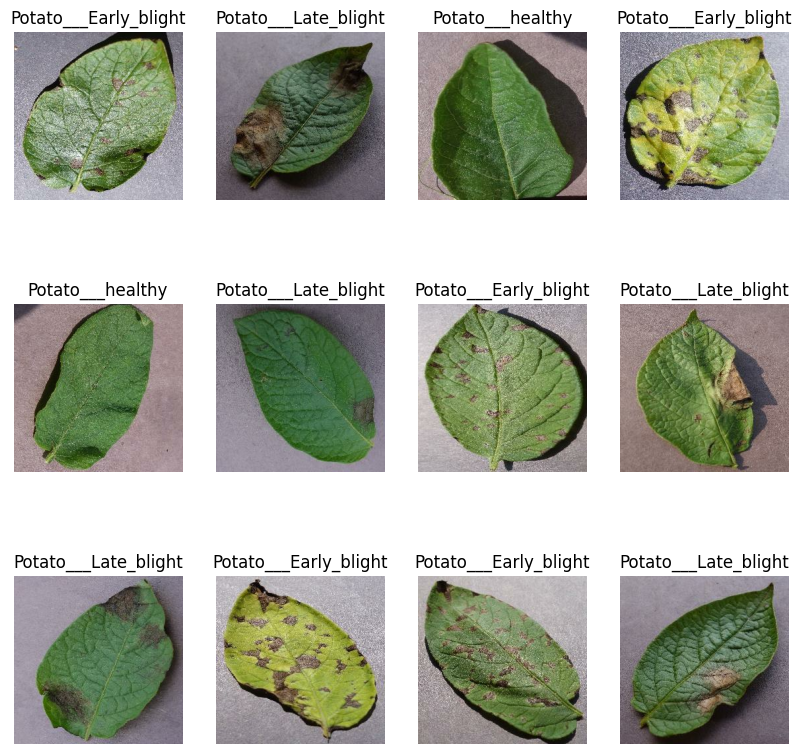

In [12]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax= plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [18]:
len(dataset)

68

In [23]:
# 80% ==> training
# 20% ==> 10% validation, 10% test

In [24]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [25]:
train_ds=dataset.take(54)
len(train_ds)

54

In [26]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [27]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [28]:
val_ds =test_ds.take(6)
len(val_ds)

6

In [29]:
test_ds =test_ds.skip(6)
len(test_ds)

8

In [31]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1,test_split=0.1,shuffle=True ,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)

    
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [33]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [34]:
len(train_ds)

54

In [35]:
len(val_ds)

6

In [36]:
len(test_ds)

8

In [37]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [38]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [39]:
data_augmentation=tf.keras.Sequential([
     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [42]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model= models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [44]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [46]:
history= model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50


54/54 [==============================] - 375s 6s/step - loss: 0.9391 - accuracy: 0.4838 - val_loss: 0.8780 - val_accuracy: 0.5052
Epoch 2/50
54/54 [==============================] - 279s 5s/step - loss: 0.8858 - accuracy: 0.5278 - val_loss: 0.7961 - val_accuracy: 0.5469
Epoch 3/50
54/54 [==============================] - 302s 6s/step - loss: 0.7597 - accuracy: 0.7020 - val_loss: 0.5648 - val_accuracy: 0.7969
Epoch 4/50
54/54 [==============================] - 292s 5s/step - loss: 0.5470 - accuracy: 0.7859 - val_loss: 0.4897 - val_accuracy: 0.7969
Epoch 5/50
54/54 [==============================] - 294s 5s/step - loss: 0.4494 - accuracy: 0.8206 - val_loss: 0.3314 - val_accuracy: 0.8958
Epoch 6/50
54/54 [==============================] - 286s 5s/step - loss: 0.3449 - accuracy: 0.8565 - val_loss: 0.2944 - val_accuracy: 0.9062
Epoch 7/50
54/54 [==============================] - 415s 8s/step - loss: 0.2886 - accuracy: 0.8895 - val_loss: 0.3106 - val_accuracy: 0.8698
Epoch 8/50


In [47]:
scores= model.evaluate(test_ds)

8/8 [==============================] - 27s 787ms/step - loss: 0.0326 - accuracy: 0.9844


In [48]:
scores


[0.0325857512652874, 0.984375]

In [49]:
history

In [50]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [51]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [52]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

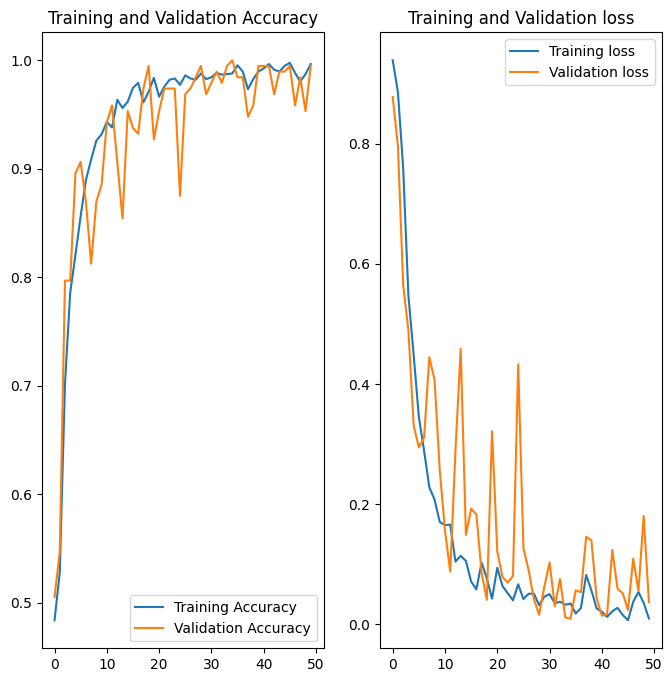

In [75]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training loss')
plt.plot(range(EPOCHS),val_loss,label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')
plt.show()

In [66]:
np.argmax([9.9999964e-01,3.9333537e-07,1.1586251e-15])

0

first image to predict
 actual label: Potato___Early_blight
1/1 [==============================] - 3s 3s/step
predicted label: Potato___Early_blight


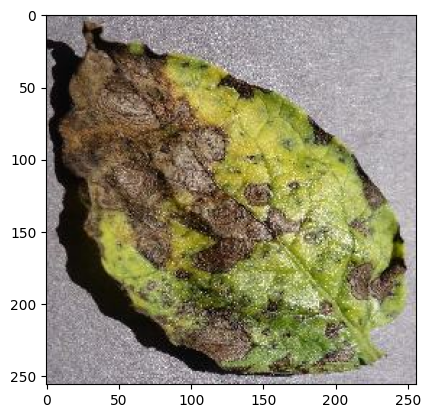

In [67]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print(" actual label:",class_names[first_label])
    batch_prediction= model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [68]:
def predict(model,img):
    img_array =tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array =tf.expand_dims(img_array,0)
    predictions=model.predict(img_array)
    predicted_class =class_names[np.argmax(predictions[0])]
    confidence =round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 78ms/step


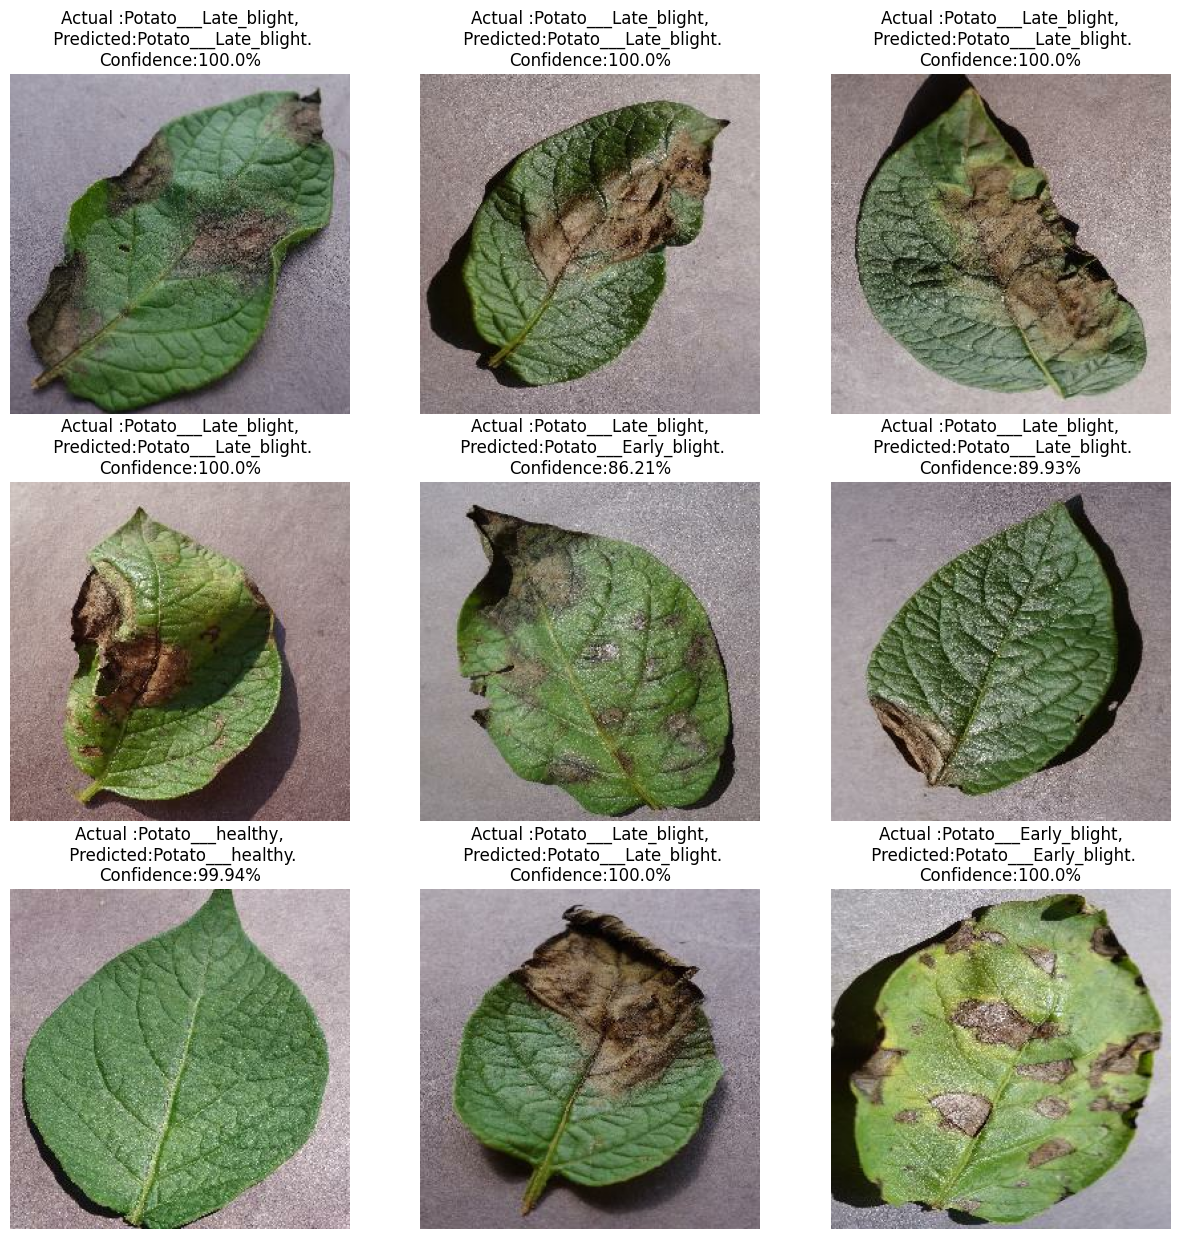

In [72]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        plt.title(f"Actual :{actual_class},\n Predicted:{predicted_class}.\nConfidence:{confidence}%")
        plt.axis("off")

In [74]:
model_version=1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
